# 1. Đọc dữ liệu (1 điểm)

In [2]:
import pandas as pd

# Đọc dữ liệu
df = pd.read_csv('black_friday.csv')

# Hiển thị 5 dòng đầu tiên
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


# 2. Thông tin dữ liệu (1 điểm)

In [5]:
# Kiểm tra số dòng và số cột
df.shape

# Kiểm tra số lượng giá trị bị thiếu trong từng cột
df.info()
# print(f'co {df.isna().sum().sum()} gia tri thieu')
print('so luong gia tri con thieu trong tung cot')
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB
so luong gia t

Nhận xét:
-
-
-

# 3. Phân loại thuộc tính (1 điểm)


In [6]:
# Code
# df.columns
qualitative = df.select_dtypes(include=['object']).columns.tolist()  # Thuộc tính định tính (categorical)
quantitative = df.select_dtypes(include=['number']).columns.tolist()  # Thuộc tính định lượng (numerical)

print("Thuộc tính định tính:", qualitative)
print("Thuộc tính định lượng:", quantitative)


Thuộc tính định tính: ['Product_ID', 'Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years']
Thuộc tính định lượng: ['User_ID', 'Occupation', 'Marital_Status', 'Product_Category_1', 'Product_Category_2', 'Product_Category_3', 'Purchase']


- Các thuộc tính định tính (Categorical):



- Các thuộc tính định lượng (Numerical):




# 4. Sản phẩm phổ biến (1 điểm)

In [10]:
# Số lượng loại sản phẩm khác nhau
print(f'co luong loai san pham khac nhau: {df['Product_ID'].nunique()}')

# Sản phẩm được mua nhiều nhất
print(f'san pham mua duoc nhieu nhat: {df['Product_ID'].value_counts().idxmax()}')



co luong loai san pham khac nhau: 3631
san pham mua duoc nhieu nhat: P00265242


Nhận xét:

-
-


# 5. Tỷ lệ nam và nữ (1 điểm)

In [23]:
# Đếm số lượng nam và nữ
print(f'so luong nam: {df['Gender'].value_counts()['M']}')
print(f'so luong nu: {df['Gender'].value_counts()['F']}')

# Trực quan hóa (biểu đồ histogram)
import seaborn as sns
import matplotlib.pyplot as plt


so luong nam: 414259
so luong nu: 135809


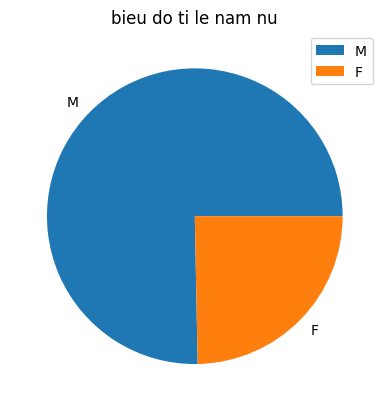

In [29]:
# sns(df['Gender'].value_counts())
plt.pie(df['Gender'].value_counts(), labels = df['Gender'].value_counts().index)
plt.title('bieu do ti le nam nu')
plt.legend()
plt.show()

# 6. Nhóm tuổi có mức chi tiêu trung bình cao nhất (1 điểm)

Age
0-17     8933.464640
18-25    9169.663606
26-35    9252.690633
36-45    9331.350695
46-50    9208.625697
51-55    9534.808031
55+      9336.280459
Name: Purchase, dtype: float64
nhom tuoi co muc chi tieu trung binh cao nhat : 51-55


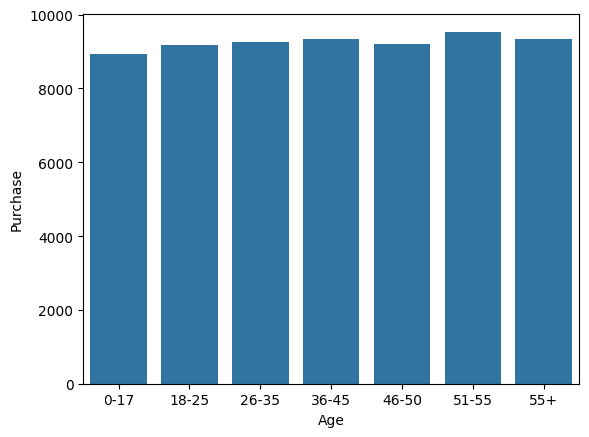

In [38]:
ans = df.groupby('Age')['Purchase'].mean()
# print(f'nhom tuoi co muc trung binh cao nhat : {ans}')
print(ans)
sns.barplot(data = ans)
print(f'nhom tuoi co muc chi tieu trung binh cao nhat : {ans.idxmax()}')

# 7. Thống kê mức chi tiêu

In [39]:
# Tính các đại lượng thống kê
df['Purchase'].agg(['mean', 'median', 'std'])


mean      9263.968713
median    8047.000000
std       5023.065394
Name: Purchase, dtype: float64

Nhận xét:
-
-

# 8. Trực quan hóa phân bố chi tiêu

<Axes: xlabel='Purchase', ylabel='Count'>

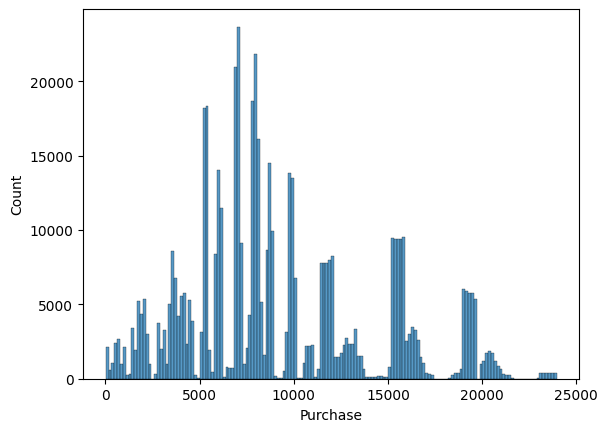

In [40]:
# Vẽ đồ thị Histogram hoặc Line hoặc hỗn hợp.
a = df['Purchase']
sns.histplot(a)



Nhận xét:
-
-

# 9. Biểu đồ hộp so sánh mức chi tiêu theo nhóm tuổi và giới tính (1 điểm)






<Axes: xlabel='Age', ylabel='Purchase'>

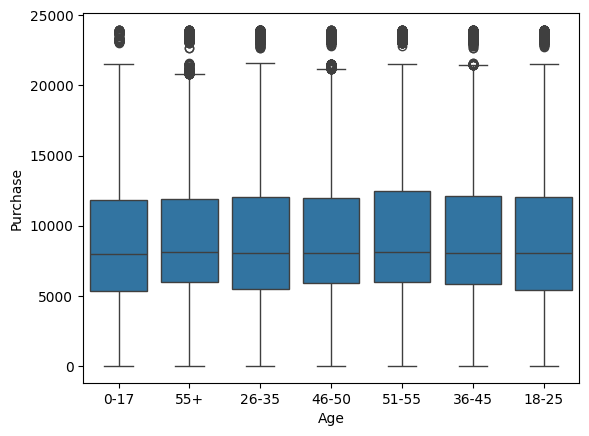

In [41]:
# Biểu đồ hộp (box-plot)
sns.boxplot(data = df, x = 'Age', y = 'Purchase')



Nhận xét:
-
-

# 10. Biểu đồ tròn thể hiện tỷ lệ tổng chi tiêu của từng nhóm tuổi

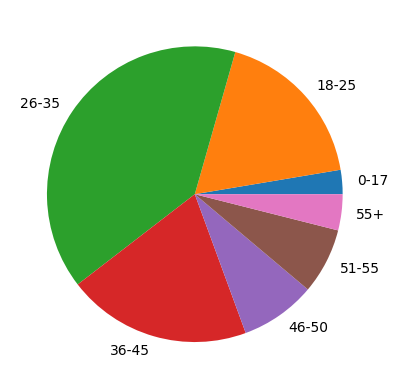

In [46]:
# Biểu đồ tròn
a = df.groupby('Age')['Purchase'].sum()
plt.pie(a, labels= a.index)
plt.show()
